In [1]:
#Import all libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("loan.csv")

In [4]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [5]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [7]:
# 1. Effective date and due date are objects instead of datetime data type
# 2. loan_status is an object instead of integer (0 and 1)

In [8]:
df['loan_status'].value_counts()

loan_status
PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: count, dtype: int64

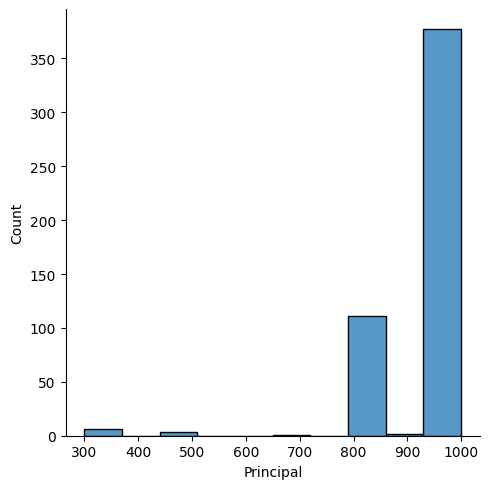

In [9]:
sns.displot(df['Principal']);

In [10]:
df.Gender.value_counts()

Gender
male      423
female     77
Name: count, dtype: int64

In [11]:
df.education.value_counts()

education
college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: count, dtype: int64

In [12]:
# Data Cleaning

In [13]:
df["Gender"] = df["Gender"].map({'male': 1, 'female':0})

In [14]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,1
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,0
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,0
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,1
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,0


In [15]:
newdata = pd.get_dummies(df["education"], dtype = int)

In [16]:
newdata

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
495,0,1,0,0
496,0,1,0,0
497,0,0,0,1
498,0,0,0,1


In [17]:
df['loan_status'] = df['loan_status'].map({"PAIDOFF": 1, "COLLECTION": 0, "COLLECTION_PAIDOFF": 0})

In [18]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,1,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,1
1,xqd20168902,1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,0
2,xqd20160003,1,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,0
3,xqd20160004,1,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,1
4,xqd20160005,1,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,0


In [19]:
df = pd.concat([df, newdata], axis=1)

In [20]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Bechalor,High School or Below,Master or Above,college
0,xqd20166231,1,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,1,0,1,0,0
1,xqd20168902,1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,0,1,0,0,0
2,xqd20160003,1,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,0,1,0,0,0
3,xqd20160004,1,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,1,0,0,0,1
4,xqd20160005,1,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,0,0,0,0,1


In [21]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'Bechalor', 'High School or Below', 'Master or Above',
       'college'],
      dtype='object')

In [22]:
X = df[['Principal', 'terms', 'age',
       'Gender', 'Bechalor', 'High School or Below', 'Master or Above',
       'college']]

In [23]:
y= df["loan_status"]

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: loan_status, Length: 500, dtype: int64

In [25]:
#Split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
X_train

,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
227,800,15,37,1,1,0,0,0
417,800,15,25,1,0,1,0,0
203,800,15,27,1,0,0,0,1
126,1000,15,28,1,0,1,0,0
329,1000,30,44,1,1,0,0,0
...,...,...,...,...,...,...,...,...
106,1000,30,31,1,0,1,0,0
270,1000,30,29,1,0,1,0,0
348,1000,30,32,1,0,1,0,0
435,1000,30,29,1,1,0,0,0


In [27]:
X_test

,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
361,800,15,29,1,0,1,0,0
73,1000,15,34,1,0,0,0,1
374,1000,30,29,1,0,0,0,1
155,1000,30,36,0,0,1,0,0
104,1000,15,35,1,0,0,0,1
...,...,...,...,...,...,...,...,...
220,1000,15,35,1,0,0,0,1
176,1000,30,38,1,0,1,0,0
320,1000,30,25,1,0,0,0,1
153,1000,15,30,1,0,0,0,1


In [28]:
y_test

361    0
73     1
374    0
155    1
104    1
      ..
220    1
176    1
320    0
153    1
231    1
Name: loan_status, Length: 125, dtype: int64

In [29]:
y_train

227    1
417    0
203    1
126    1
329    0
      ..
106    1
270    1
348    0
435    0
102    1
Name: loan_status, Length: 375, dtype: int64

In [30]:
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)

In [31]:
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,8)
y_test = y_test.reshape(-1,1)
X_train = X_train.reshape(-1,8)

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape

(375, 8)

In [34]:
# Logistics Regression
#initialise model
logmodel = LogisticRegression(penalty = 'l1', solver = 'liblinear')

In [35]:
logmodel.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', solver='liblinear')

In [36]:
logprediction = logmodel.predict(X_test)

In [37]:
print(metrics.accuracy_score(y_test, logprediction))

0.544


In [38]:
rmodel = RandomForestClassifier()

In [39]:
rmodel.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [40]:
rpredictions = rmodel.predict(X_test)

In [41]:
metrics.accuracy_score(y_test, rpredictions)

0.48

In [42]:
kmodel = KNeighborsClassifier(n_neighbors=51)

In [43]:
kmodel.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=51)

In [44]:
kprediction = kmodel.predict(X_test)

In [45]:
metrics.accuracy_score(y_test, kprediction)

0.568

In [46]:
k2model = KNeighborsClassifier()

In [47]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,45, 49, 51, 53, 55, 81,101]}

In [48]:
grsearch = GridSearchCV(k2model, param_grid, cv = 5)

In [49]:
grsearch.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         45, 49, 51, 53, 55, 81, 101]})

In [50]:
grsearch.best_params_

{'n_neighbors': 51}

In [51]:
grsearch.best_score_

np.float64(0.626)

# DEEP LEARNING

In [52]:
X_train.shape

(375, 8)

In [53]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
tfmodel = Sequential()

tfmodel.add(Dense(8, activation = 'relu'))

tfmodel.add(Dense(6, activation = 'relu'))
tfmodel.add(Dense(4, activation = 'relu'))

tfmodel.add(Dense(1, activation = 'sigmoid'))
# Compile the model

tfmodel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [55]:
tfmodel.fit(x = X_train, y = y_train, epochs = 50, validation_data = (X_test, y_test) )

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5587 - loss: 0.6883 - val_accuracy: 0.5360 - val_loss: 0.6925
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5934 - loss: 0.6837 - val_accuracy: 0.5440 - val_loss: 0.6916
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6214 - loss: 0.6780 - val_accuracy: 0.5440 - val_loss: 0.6911
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6143 - loss: 0.6743 - val_accuracy: 0.5440 - val_loss: 0.6911
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6244 - loss: 0.6679 - val_accuracy: 0.5440 - val_loss: 0.6916
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 0.6649 - val_accuracy: 0.5440 - val_loss: 0.6922
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5860 - loss: 0.6722 - val_accuracy: 0.5440 - val_loss: 0.6932
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6299 - loss: 0.6596 - val_accuracy: 0.5440 - val_loss:

In [56]:
predictions = (tfmodel.predict(X_test) > 0.5).astype('int')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [57]:
predictions

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [58]:
metrics.accuracy_score(y_test, predictions)

0.544

# Deployment

In [60]:
logmodel

LogisticRegression(penalty='l1', solver='liblinear')

In [61]:
import joblib

In [64]:
joblib.dump(logmodel, 'logmodel.pkl')

['logmodel.pkl']

In [65]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [69]:
X_test[100]

array([1.        , 0.34782609, 0.5       , 0.        , 1.        ,
       0.        , 0.        , 0.        ])